<center><img src="images/title.png" width="95%"/></center>
<center><a href="http://bit.ly/pybay-keras">bit.ly/pybay-keras</a></center>

Who Am I?
-----

<center>Brian Spiering</center>

What do I do?
------

<center>Professor</center>
<center><img src="images/msds_logo.png" width="30%"/></center>

<center><img src="images/real_deep_learning.png" width="80%"/></center>

Keras - Neural Networks for humans
------

<center><img src="images/keras-logo-small.jpg" width="25%"/></center>

A higher-level, more intuitive API for Deep Learning.

Easy to define neural networks, then automatically handles execution.

A simple and highly modular interface which allows focus on learning and enabling fast experimentation

Deep Learning 101
-----

<center><img src="images/neural_nets.jpg" width="75%"/></center>

Deep Learning (DL) are Neural networks (NN) with >1 hidden layer
-------

<center><img src="images/neural-networks-layers.jpg" width="80%"/></center>

Neural Networks are Nodes & Edges
------
<center><img src="images/sum.png" width="75%"/></center>

Nonlinear function allows learning of nonlinear relationships
------

<center><img src="images/function_3.png" width="80%"/></center>

Groups of nodes all the way down
------

<center><img src="images/layers.png" width="75%"/></center>

Deep Learning isn't magic, it is just very good at finding patterns.
------

<center><img src="images/features.png" width="80%"/></center>

Deep Learning has fewer steps than traditional Machine Learning
------

<center><img src="images/traditional-ml-deep-learning-2.png" width="100%"/></center>

If you want to follow along…
-----

GitHub repo: [bit.ly/pybay-keras](http://bit.ly/pybay-keras)

If you want to type along…
------

1. Run a local Jupyter Notebook
1. [Binder](https://mybinder.org/v2/gh/brianspiering/keras-intro/master): In-Browser Jupyter Notebook
1. [Colaboratory](https://colab.research.google.com/): "Google Docs for Jupyter Notebooks"

In [65]:
reset -fs

In [66]:
import keras

In [95]:
# What is the backend / execution engine?

In [67]:
keras.backend.backend()

'tensorflow'

<center><img src="images/tf_logo.jpg" width="70%"/></center>

"An open-source software library for Machine Intelligence"

Numerical computation using data flow graphs. 

TensorFlow: A great backend
------
A __very__ flexible architecture that allows you to do almost any operation.

Then deploy the computation to CPUs (one or more) or GPUs across desktop, cloud, or mobile device. 
<center><img src="images/tf_features.png" width="45%"/></center>

MNIST handwritten digit database: <br> The “Hello World!” of Computer Vision
------

<center><img src="images/mnist-digits.png" width="80%"/></center>

<center><img src="images/MNIST-Matrix.png" width="80%"/></center>

<center><img src="images/MNIST_neuralnet_image.png" width="80%"/></center>

In [68]:
# Import data


In [ ]:
from keras.datasets import mnist

In [69]:
# Setup train and test splits


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [70]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

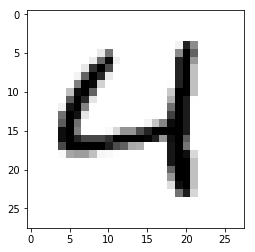

In [71]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r');

Munge data
-----

<center><img src="images/mnist_keras.png" width="75%"/></center>

Convert image matrix into vector to feed into first layer 

In [ ]:
# Convert matrix to vector

In [72]:

image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32') # Cast as 32 bit integers
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32') # Cast as 32 bit integers
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

In [73]:
# Convert class vectors to binary class matrices


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [74]:
# Import the most common type of neural network


In [ ]:
from keras.models import Sequential

RTFM - https://keras.io/layers/

In [75]:
# Define model instance


In [ ]:
model = Sequential()

In [76]:
# Import the most common type of network layer, fulling interconneced


In [ ]:
from keras.layers import Dense

<center><img src="images/dense.png" width="55%"/></center>

In [77]:
# Define input layer


In [ ]:
layer_input = Dense(units=512, # Number of nodes
                    activation='sigmoid', # The nonlinearity
                    input_shape=(image_size,)) 
model.add(layer_input)

In [78]:
# Define another layer


In [ ]:
model.add(Dense(units=512, activation='sigmoid'))

In [79]:
# Define output layers


In [ ]:
layer_output = Dense(units=10, # Number of digits (0-9)
                     activation='softmax') # Convert neural activation to probability of category

model.add(layer_output)

In [80]:
# Print summary


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

In [81]:
# Yes - we compile the model to run it


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [82]:
# Define training


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 14s 255us/step - loss: 2.1430 - acc: 0.3381 - val_loss: 1.8788 - val_acc: 0.5865
Epoch 2/5
54000/54000 [==============================] - 13s 246us/step - loss: 1.4831 - acc: 0.6650 - val_loss: 1.0612 - val_acc: 0.7767
Epoch 3/5
54000/54000 [==============================] - 13s 245us/step - loss: 0.8919 - acc: 0.7898 - val_loss: 0.6704 - val_acc: 0.8498
Epoch 4/5
54000/54000 [==============================] - 13s 248us/step - loss: 0.6475 - acc: 0.8376 - val_loss: 0.5063 - val_acc: 0.8808
Epoch 5/5
54000/54000 [==============================] - 16s 301us/step - loss: 0.5343 - acc: 0.8579 - val_loss: 0.4244 - val_acc: 0.8933


In [ ]:
training = model.fit(x_train, 
                     y_train,
                     epochs=5, # Number of passes over complete dataset
                     verbose=True, 
                     validation_split=0.1)

<center><img src="images/waiting.jpg" width="50%"/></center>

In [83]:
# Let's see how good we did


10000/10000 [==============================] - 1s 94us/step
Test loss: 0.475
Test accuracy: 87.440%


In [ ]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

Keras' Other Features
-----

- Common built-in functions (e.g., activation functions and optimitizers)
- Convolutional neural network (CNN or ConvNet)
- Recurrent neural network (RNN) & Long-short term memory (LSTM)
- Pre-trained models

Summary
-----

- Keras is designed for human beings, not computers.
- Simple to define complex neural networks.
- Easier to learn about Deep Learning (focus on the __what__, not the __how__)

<center><img src="images/twitter.png" width="75%"/></center>

Futher Study - Keras
--------

- Keras docs
    - https://keras.io/
    - https://blog.keras.io/
- Keras courses
    - https://www.edx.org/course/deep-learning-fundamentals-with-keras
    - https://www.coursera.org/lecture/ai/keras-overview-7GfN9


Futher Study - Deep Learning
--------

- Linear Algebra, Probability, Machine Learning
- Study Deep Learning
    - [fastai Course](http://www.fast.ai/)
    - [Deep Learning Book](http://www.deeplearningbook.org/)

<br>

Bonus Material
--------

In [84]:
from keras import *

In [85]:
whos

Variable          Type          Data/Info
-----------------------------------------
Dense             type          <class 'keras.layers.core.Dense'>
Input             function      <function Input at 0x120fe18c8>
Model             type          <class 'keras.engine.training.Model'>
Sequential        type          <class 'keras.engine.sequential.Sequential'>
absolute_import   _Feature      _Feature((2, 5, 0, 'alpha<...>0, 0, 'alpha', 0), 16384)
accuracy          float64       0.8744
activations       module        <module 'keras.activation<...>es/keras/activations.py'>
applications      module        <module 'keras.applicatio<...>pplications/__init__.py'>
backend           module        <module 'keras.backend' f<...>ras/backend/__init__.py'>
callbacks         module        <module 'keras.callbacks'<...>ages/keras/callbacks.py'>
constraints       module        <module 'keras.constraint<...>es/keras/constraints.py'>
datasets          module        <module 'keras.datasets' <...>as/dataset

In [86]:
from keras.datasets import fashion_mnist

In [87]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

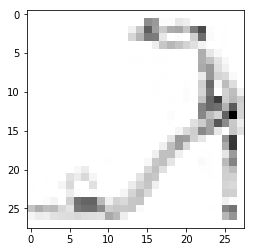

In [88]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r');

In [89]:
# Define CNN model

# Redefine input dimensions to make sure conv works
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [90]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [91]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [92]:
# Define model
model = Sequential()
model.add(Conv2D(32, 
             kernel_size=(3, 3),
             activation='sigmoid',
             input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [93]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [94]:
# Define training
training = model.fit(x_train, 
                     y_train,
                     epochs=5,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 208s 4ms/step - loss: 1.0044 - acc: 0.7066 - val_loss: 0.3622 - val_acc: 0.8710
Epoch 2/5
54000/54000 [==============================] - 205s 4ms/step - loss: 0.2965 - acc: 0.8937 - val_loss: 0.2828 - val_acc: 0.8968
Epoch 3/5
 6080/54000 [==>...........................] - ETA: 2:44 - loss: 0.2287 - acc: 0.9164

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

What is `keras`?    
-----

<center><img src="https://www.thevintagenews.com/wp-content/uploads/2017/08/a-drinking-horn-from-the-16th-century-known-as-the-roordahuizum-drinking-horn-on-display-in-the-frisian-museum-at-leeuwarden-640x360.jpg" width="75%"/></center>

Keras (κέρας) means horn in Greek. It is a reference to a literary image from ancient Greek and Latin literature, first found in the Odyssey, where dream spirits (Oneiroi, singular Oneiros) are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. It's a play on the words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

[Source](https://keras.io/#why-this-name-keras)

<br>